In [224]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import hsv_to_rgb
from matplotlib import cm
from matplotlib import colors
import cv2
from skimage.io import imread, imshow



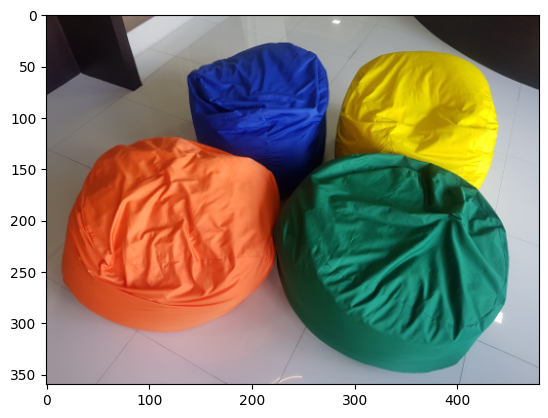

In [225]:

img = cv2.imread("C:\\Users\\danna\\OneDrive\\Documents\\UNI\\6to semestre\\Robotica\\python\\bags.png")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


SEGUNDO METODO

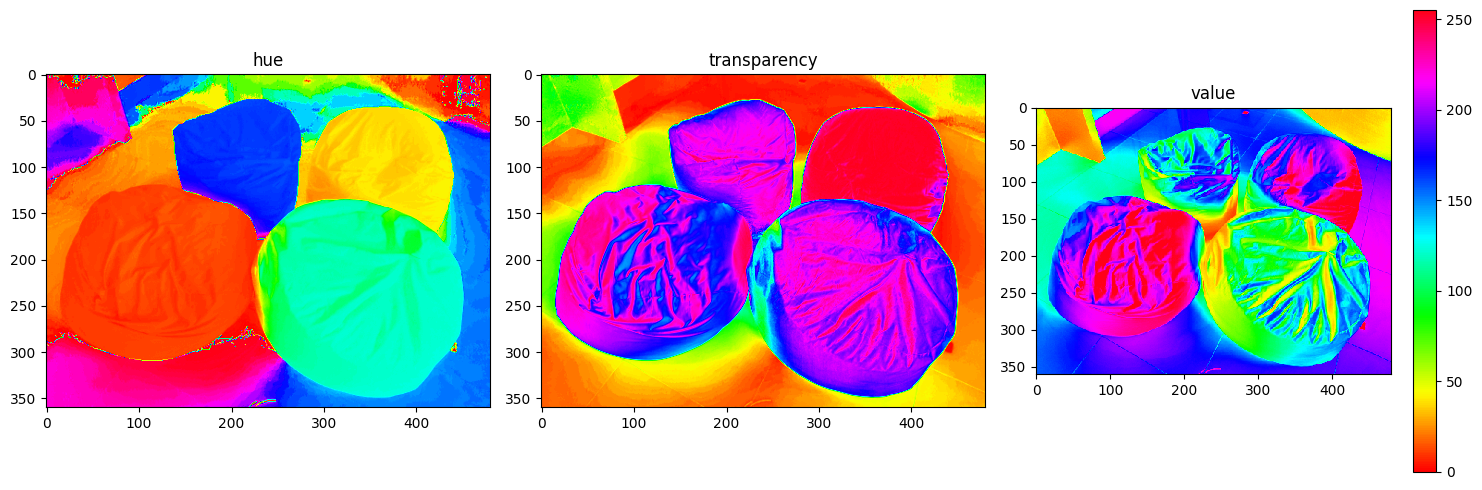

In [226]:
#another methoth
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(hsv_img[:,:,0], cmap = 'hsv')
ax[0].set_title('hue')
ax[1].imshow(hsv_img[:,:,1], cmap = 'hsv')
ax[1].set_title('transparency')
ax[2].imshow(hsv_img[:,:,2], cmap = 'hsv')
ax[2].set_title('value')
fig.colorbar(imshow(hsv_img[:,:,2], cmap = 'hsv'))
fig.tight_layout()
plt.show()

In [227]:
#ROJO
#refer to hue channel
lower_mask = hsv_img[:,:,0] > 0
higher_mask = hsv_img[:,:,0] < 15

#transparency
lower_saturation_mask = hsv_img[:,:, 1] > 140
higher_saturation_mask = hsv_img[:,:, 1] < 250

value_mask = hsv_img[:,:, 2] > 50


mask2 = higher_mask*lower_mask*lower_saturation_mask*higher_saturation_mask*value_mask
red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2

rojo = np.dstack((red, green, blue))
#imshow(rojo)


In [228]:
#AZUL
#refer to hue channel
lower_mask = hsv_img[:,:,0] > 100
higher_mask = hsv_img[:,:,0] < 200

#transparency
lower_saturation_mask = hsv_img[:,:, 1] > 150
higher_saturation_mask = hsv_img[:,:, 1] < 230

higher_value_mask = hsv_img[:,:, 2] > 0
lower_value_mask = hsv_img[:,:, 2] < 175


mask2 = higher_mask*lower_mask*lower_saturation_mask#*higher_saturation_mask*higher_value_mask*lower_value_mask
red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2

azul = np.dstack((red, green, blue))



In [229]:
#AMARILLO
#refer to hue channel
lower_mask = hsv_img[:,:,0] > 15
higher_mask = hsv_img[:,:,0] < 60

#transparency
lower_saturation_mask = hsv_img[:,:, 1] > 190
#higher_saturation_mask = hsv_img[:,:, 1] < 250

value_mask = hsv_img[:,:, 2] > 100


mask2 = higher_mask*lower_mask*lower_saturation_mask*value_mask
red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2

amarillo = np.dstack((red, green, blue))
#imshow(amarillo)


In [230]:
#VERDE
#refer to hue channel
lower_mask = hsv_img[:,:,0] > 60
higher_mask = hsv_img[:,:,0] < 105

#transparency
lower_saturation_mask = hsv_img[:,:, 1] > 50
#higher_saturation_mask = hsv_img[:,:, 1] < 250

value_mask = hsv_img[:,:, 2] > 0


mask2 = higher_mask*lower_mask*lower_saturation_mask*value_mask
red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2

verde = np.dstack((red, green, blue))
#imshow(verde)


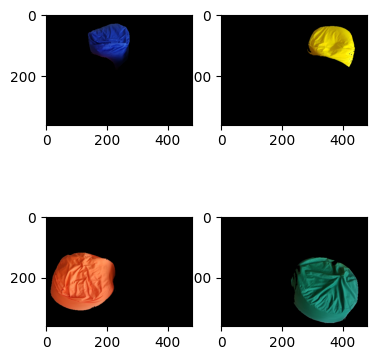

In [231]:
plt.subplot(2, 3, 1)
plt.imshow((azul))
plt.subplot(2, 3, 2)
plt.imshow((amarillo))
plt.subplot(2, 3, 4)
plt.imshow((rojo))
plt.subplot(2, 3, 5)
plt.imshow((verde))


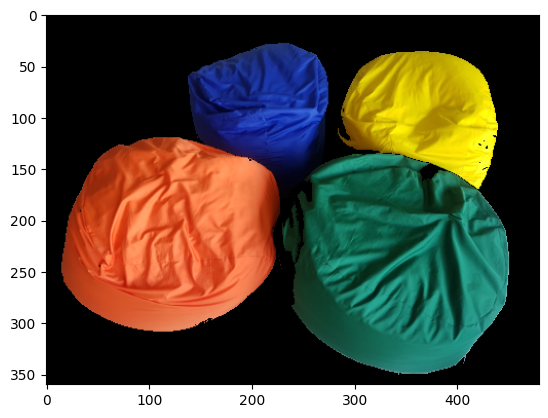

In [232]:
juntas = azul + amarillo + verde + rojo

plt.imshow((juntas))

PRIMER METODO

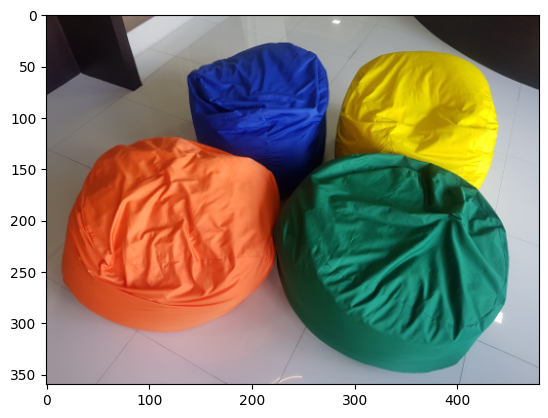

In [233]:
img = cv2.imread("C:\\Users\\danna\\OneDrive\\Documents\\UNI\\6to semestre\\Robotica\\python\\bags.png")
#plt.imshow(img)
#plt.show()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


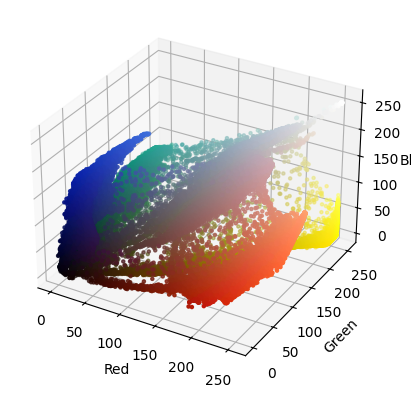

In [234]:
r, g, b = cv2.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = '3d')
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin = -1, vmax = 1)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors = pixel_colors, marker = ".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

Text(0.5, 0, 'Value')

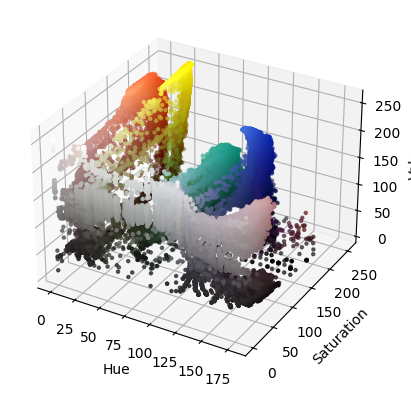

In [235]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = '3d')
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors = pixel_colors, marker = ".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")



Text(0, 0.5, 'v')

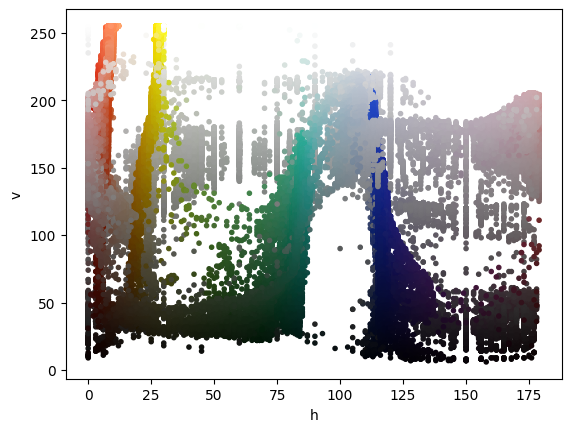

In [236]:
#HUE X VALUE
fig = plt.figure()

axis = fig.add_subplot(1, 1, 1)

axis.scatter(h.flatten(), v.flatten(),facecolors = pixel_colors, marker = ".")
axis.set_xlabel("h")
axis.set_ylabel("v")

Text(0, 0.5, 'v')

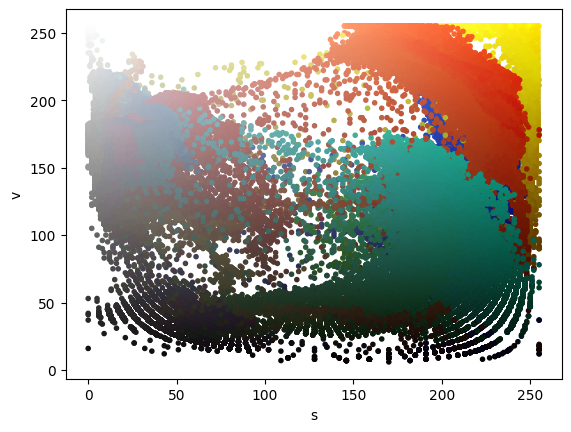

In [237]:
#SATURATION X VALUE
fig = plt.figure()

axis = fig.add_subplot(1, 1, 1)

axis.scatter(s.flatten(), v.flatten(),facecolors = pixel_colors, marker = ".")
axis.set_xlabel("s")
axis.set_ylabel("v")


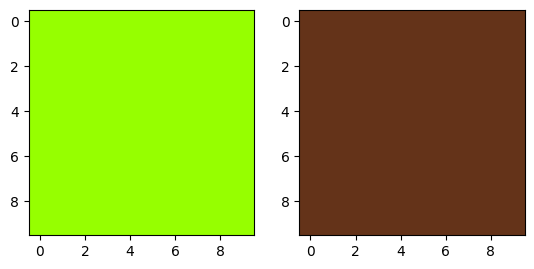

In [238]:
#AMARILLO
#            h,   s,   v
#light_red = (200, 255, 150) #grande
#dark_red = (50, 50, 50) #pequenio

light_red = (60, 255, 255) #grande
dark_red = (15, 190, 100) #pequenio

lo_square = np.full((10, 10, 3), light_red, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_red, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))

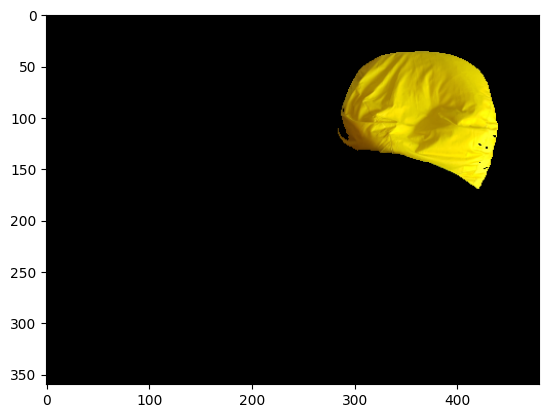

In [239]:
mask = cv2.inRange(hsv_img, dark_red, light_red)
amarillo = cv2.bitwise_and(img, img, mask = mask)
#plt.subplot(1, 2, 1)
#plt.imshow(mask, cmap = "grey")
#plt.subplot(1, 2, 2)
plt.imshow(amarillo, cmap = "grey")
plt.show()

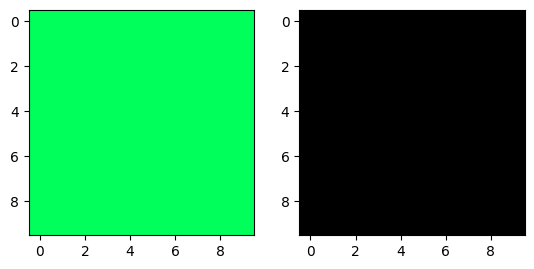

In [240]:
light_red = (100, 255, 255) #grande
dark_red = (62, 50, 0) #pequenio

lo_square = np.full((10, 10, 3), light_red, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_red, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))

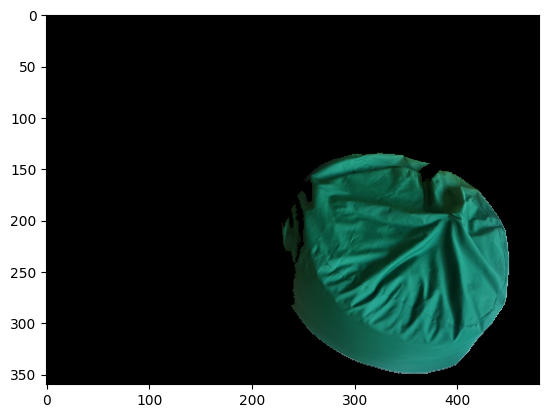

In [241]:
#VERDE
img = cv2.imread("C:\\Users\\danna\\OneDrive\\Documents\\UNI\\6to semestre\\Robotica\\python\\bags.png")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = cv2.inRange(hsv_img, dark_red, light_red)
verde = cv2.bitwise_and(img, img, mask = mask)
#plt.subplot(1, 2, 1)
#plt.imshow(mask, cmap = "grey")
#plt.subplot(1, 2, 2)
plt.imshow(verde, cmap = "grey")
plt.show()

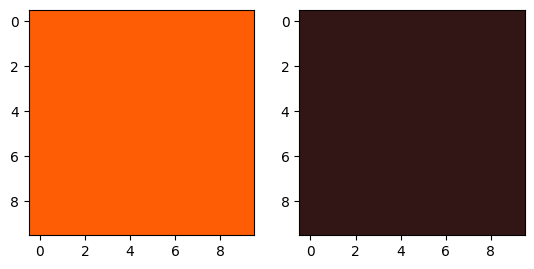

In [242]:
#            h,   s,   v
#light_red = (200, 255, 150) #grande
#dark_red = (50, 50, 50) #pequenio

light_red = (15, 250, 255) #grande
dark_red = (0, 140, 50) #pequenio

lo_square = np.full((10, 10, 3), light_red, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_red, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))

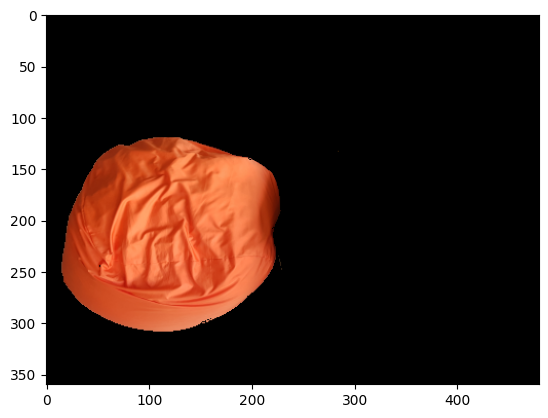

In [243]:
#ROJO
mask = cv2.inRange(hsv_img, dark_red, light_red)
rojo = cv2.bitwise_and(img, img, mask = mask)
#plt.subplot(1, 2, 1)
#plt.imshow(mask, cmap = "grey")
#plt.subplot(1, 2, 2)
plt.imshow(rojo, cmap = "grey")
plt.show()

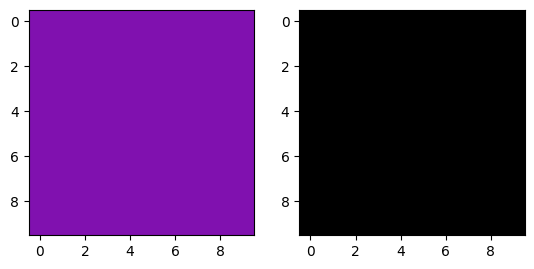

In [244]:
light_red = (200, 230, 175) #grande
dark_red = (100, 150, 0) #pequenio

lo_square = np.full((10, 10, 3), light_red, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_red, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))

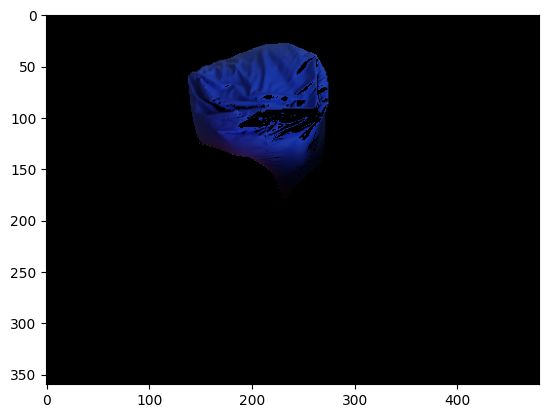

In [245]:
#AZUL
mask = cv2.inRange(hsv_img, dark_red, light_red)
azul = cv2.bitwise_and(img, img, mask = mask)
#plt.subplot(1, 2, 1)
#plt.imshow(mask, cmap = "grey")
#plt.subplot(1, 2, 2)
plt.imshow(azul, cmap = "grey")
plt.show()

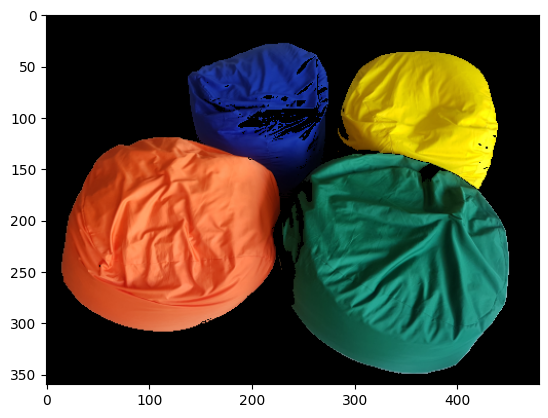

In [246]:
todos = amarillo + verde + rojo + azul
plt.imshow(todos)